In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import web.utils.pipeline as Pipeline
import web.utils.modelHGBC as modelHGBC
import web.utils.modelCNN as modelCNN
    
data = pd.read_parquet("../pipelines/data/db_pull_calibrated.parquet")
data[["hash", "activity"]].value_counts()


hash                              activity     
31ee3891f5ad49b1a989abec4dd30816  Sitzen           121884
44c4e5f5f7df4203aca2f4e17afc6f35  Velofahren       105252
fc4955e4028d4e568ea29e35f8dfbeb9  Laufen           100446
a212351e846d4da099db1a73032efe43  Stehen            95213
517458b7423a4f36920d4d95c53ad540  Sitzen            95001
                                                    ...  
1268c84076da471490dc4faf55e1ecef  Velofahren         1534
0eea13f815274effbe6722f1ee4c99cc  Velofahren          901
c9bcf02a06174e7cbc7296e5662ff8c1  Velofahren          656
75dbc98bda094aee965c921641564754  Treppenlaufen       586
b0cffbc27b1c47d2953c238d75b2bbeb  Velofahren          418
Name: count, Length: 316, dtype: int64

In [2]:
data = data[data["hash"] == "44c4e5f5f7df4203aca2f4e17afc6f35"].copy()
data = data[
    [
        "timestamp",
        "AccelerometerUncalibrated_x",
        "AccelerometerUncalibrated_y",
        "AccelerometerUncalibrated_z",
        "GyroscopeUncalibrated_x",
        "GyroscopeUncalibrated_y",
        "GyroscopeUncalibrated_z",
        "MagnetometerUncalibrated_x",
        "MagnetometerUncalibrated_y",
        "MagnetometerUncalibrated_z",
    ]
].copy()
data

,timestamp,AccelerometerUncalibrated_x,AccelerometerUncalibrated_y,AccelerometerUncalibrated_z,GyroscopeUncalibrated_x,GyroscopeUncalibrated_y,GyroscopeUncalibrated_z,MagnetometerUncalibrated_x,MagnetometerUncalibrated_y,MagnetometerUncalibrated_z
1075792,2023-03-14 07:31:18.230,-0.350784,0.874252,0.683533,0.916154,-0.718947,0.596101,-101.054688,37.085785,-28.422699
1075793,2023-03-14 07:31:18.240,-0.354568,0.939713,0.667053,0.759256,-0.629756,0.616155,-100.898407,37.472794,-28.448563
1075794,2023-03-14 07:31:18.250,-0.348145,0.991501,0.662750,0.596098,-0.602743,0.614338,-100.633270,37.786163,-28.628738
1075795,2023-03-14 07:31:18.260,-0.334076,1.057129,0.676285,0.429855,-0.597451,0.581234,-99.951691,37.954346,-28.212982
1075796,2023-03-14 07:31:18.270,-0.325180,1.120972,0.688965,0.280338,-0.616189,0.527925,-99.886826,38.444351,-28.044098
...,...,...,...,...,...,...,...,...,...,...
1181039,2023-03-14 07:48:50.700,-1.004654,0.860626,0.167313,-0.662094,0.271403,-2.139438,-102.650040,45.823898,-26.776382
1181040,2023-03-14 07:48:50.710,-0.940186,0.769638,0.165649,-0.567879,0.043901,-2.104310,-104.574982,45.097153,-26.469727
1181041,2023-03-14 07:48:50.720,-0.889175,0.714935,0.172104,-0.533990,-0.189923,-2.075312,-106.120422,43.611191,-26.273544
1181042,2023-03-14 07:48:50.730,-0.866684,0.724838,0.186798,-0.551289,-0.340902,-2.045534,-107.435425,42.407272,-26.034622


In [3]:
pipeline = Pipeline.Pipeline()
data_n = pipeline.run(data, "HGBC")

model = modelHGBC.Runner("web/utils/modelHGBC.pkl")
results = model.run(data_n)
results

{0: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Rennen': 0.0,
  'Stehen': 0.0,
  'Treppenlaufen': 0.0},
 1: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Rennen': 0.0,
  'Stehen': 0.0,
  'Treppenlaufen': 0.0},
 2: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Rennen': 0.0,
  'Stehen': 0.0,
  'Treppenlaufen': 0.0},
 3: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Rennen': 0.0,
  'Stehen': 0.0,
  'Treppenlaufen': 0.0},
 4: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Rennen': 0.0,
  'Stehen': 0.0,
  'Treppenlaufen': 0.0},
 5: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Rennen': 0.0,
  'Stehen': 0.0,
  'Treppenlaufen': 0.0},
 6: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Rennen': 0.0,
  'Stehen': 0.0,
  'Treppenlaufen': 0.0},
 7: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Rennen': 0.0,
  'Stehen': 0.0,
  'Treppenlaufen': 0.0},
 8: {'Sitzen': 0.0,
  'Laufen': 0.0,
  'Velofahren': 1.0,
  'Ren

In [4]:
data_n = pipeline.run(data, "CNN")

model = modelCNN.Runner("web/utils/modelCNN.pkl")
results = model.run(data_n)
results

{0: {'Sitzen': '0.0',
  'Laufen': '0.001',
  'Velofahren': '0.972',
  'Rennen': '0.0',
  'Stehen': '0.0',
  'Treppenlaufen': '0.027'},
 1: {'Sitzen': '0.0',
  'Laufen': '0.001',
  'Velofahren': '0.969',
  'Rennen': '0.0',
  'Stehen': '0.0',
  'Treppenlaufen': '0.03'},
 2: {'Sitzen': '0.0',
  'Laufen': '0.001',
  'Velofahren': '0.944',
  'Rennen': '0.0',
  'Stehen': '0.0',
  'Treppenlaufen': '0.055'},
 3: {'Sitzen': '0.0',
  'Laufen': '0.001',
  'Velofahren': '0.974',
  'Rennen': '0.0',
  'Stehen': '0.0',
  'Treppenlaufen': '0.025'},
 4: {'Sitzen': '0.0',
  'Laufen': '0.001',
  'Velofahren': '0.967',
  'Rennen': '0.0',
  'Stehen': '0.0',
  'Treppenlaufen': '0.032'},
 5: {'Sitzen': '0.0',
  'Laufen': '0.001',
  'Velofahren': '0.968',
  'Rennen': '0.0',
  'Stehen': '0.0',
  'Treppenlaufen': '0.03'},
 6: {'Sitzen': '0.0',
  'Laufen': '0.0',
  'Velofahren': '0.945',
  'Rennen': '0.0',
  'Stehen': '0.007',
  'Treppenlaufen': '0.047'},
 7: {'Sitzen': '0.0',
  'Laufen': '0.0',
  'Velofahren': 

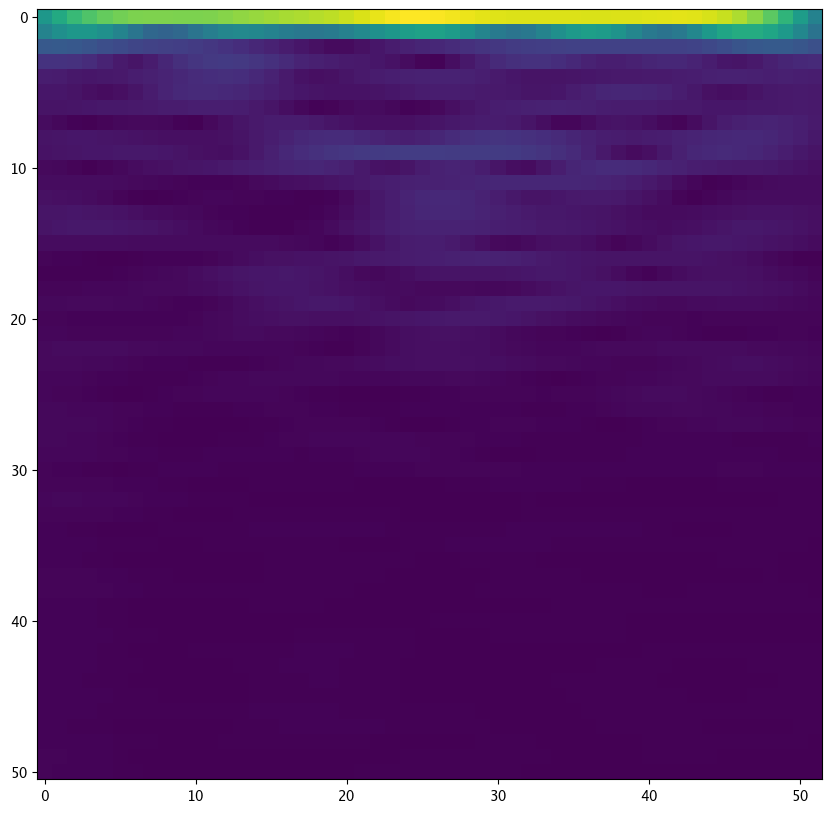

In [5]:
# plot stft
plt.figure(figsize=(20, 10))
# Segment 1, STFT Element, Channel 1
plt.imshow(data_n[0][1][0])
plt.show()